In [ ]:
### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (8, 5)


In [4]:
df = pd.read_csv('data/coupons.csv')
df.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
# STEP 3: Understand the structure
print("Shape:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isna().sum())
print("\nTarget value counts (Y):\n", df['Y'].value_counts())

Shape: (12684, 26)

Column types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

Missing values per column:
 destination                 0
passanger                   0
weather                     0
temperature               

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# STEP 4: Clean the data a bit
df_clean = df.copy()

# Drop the 'car' column (almost all missing)
if 'car' in df_clean.columns and df_clean['car'].isna().mean() > 0.95:
    df_clean = df_clean.drop(columns=['car'])

# Convert text columns to 'category' type for easier grouping
for col in df_clean.select_dtypes('object').columns:
    df_clean[col] = df_clean[col].astype('category')

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  category
 1   passanger             12684 non-null  category
 2   weather               12684 non-null  category
 3   temperature           12684 non-null  int64   
 4   time                  12684 non-null  category
 5   coupon                12684 non-null  category
 6   expiration            12684 non-null  category
 7   gender                12684 non-null  category
 8   age                   12684 non-null  category
 9   maritalStatus         12684 non-null  category
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  category
 12  occupation            12684 non-null  category
 13  income                12684 non-null  category
 14  Bar                   12577 non-null  category
 15  Co

4. What proportion of the total observations chose to accept the coupon?



In [9]:
# STEP 5: Acceptance rate by different categories
def acceptance_rate_by(feature):
    rate = df_clean.groupby(feature)['Y'].mean().sort_values(ascending=False)
    return rate.to_frame('acceptance_rate')

for col in ['coupon', 'destination', 'passanger', 'weather', 'time', 'expiration']:
    print(f"\nAcceptance rate by {col}:\n", acceptance_rate_by(col).head(10))



Acceptance rate by coupon:
                        acceptance_rate
coupon                                
Carry out & Take away         0.735478
Restaurant(<20)               0.707107
Coffee House                  0.499249
Restaurant(20-50)             0.441019
Bar                           0.410015

Acceptance rate by destination:
                  acceptance_rate
destination                     
No Urgent Place         0.633774
Home                    0.506333
Work                    0.502212

Acceptance rate by passanger:
            acceptance_rate
passanger                 
Friend(s)         0.673438
Partner           0.595349
Alone             0.525804
Kid(s)            0.504970

Acceptance rate by weather:
          acceptance_rate
weather                 
Sunny           0.594796
Snowy           0.470463
Rainy           0.462810

Acceptance rate by time:
       acceptance_rate
time                 
2PM          0.661523
10AM         0.608352
6PM          0.584520
10PM         

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\1124196322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df_clean.groupby(feature)['Y'].mean().sort_values(ascending=False)
C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\1124196322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df_clean.groupby(feature)['Y'].mean().sort_values(ascending=False)
C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\1124196322.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior o

5. Use a bar plot to visualize the `coupon` column.

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


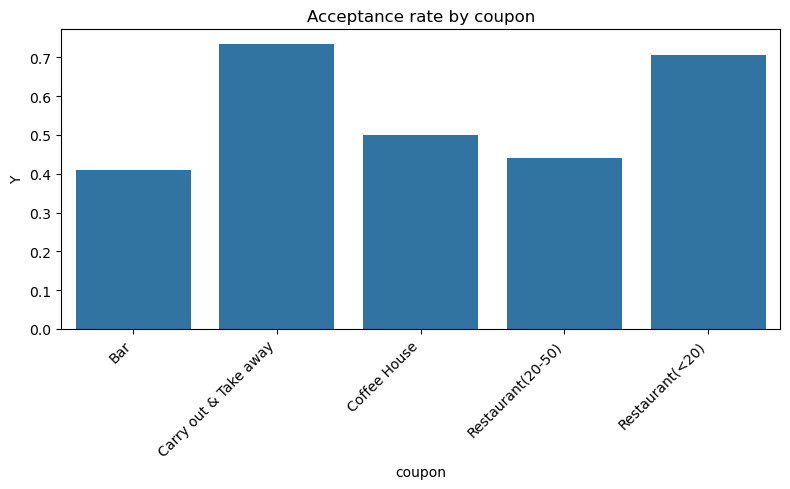

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


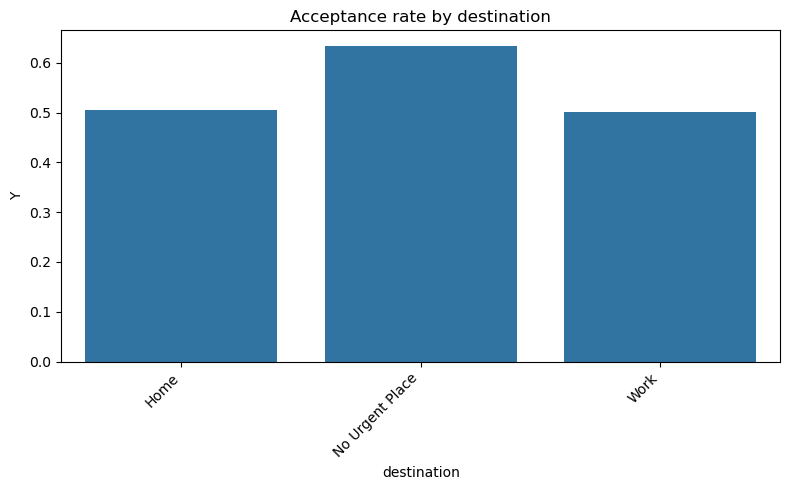

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


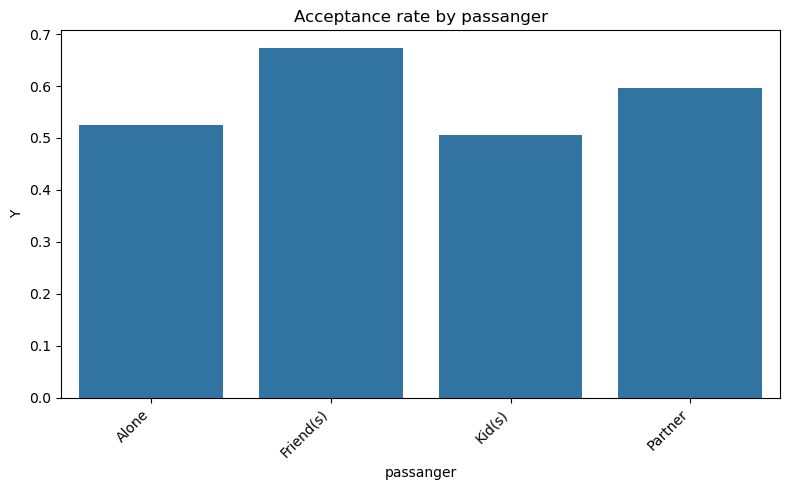

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


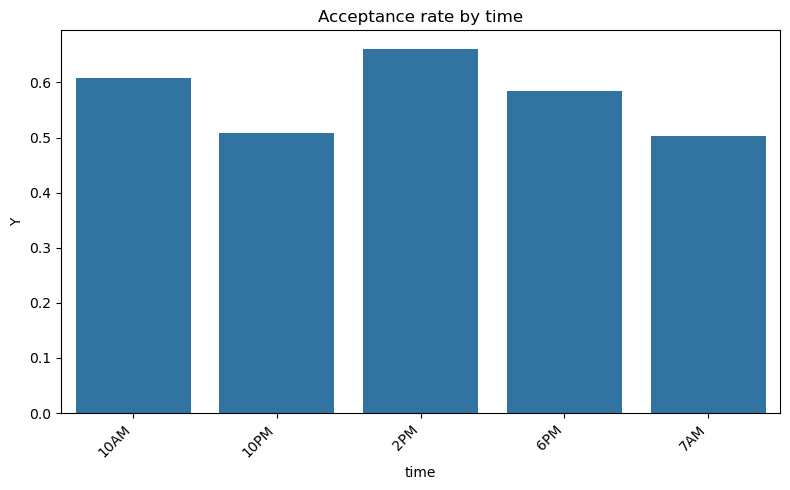

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


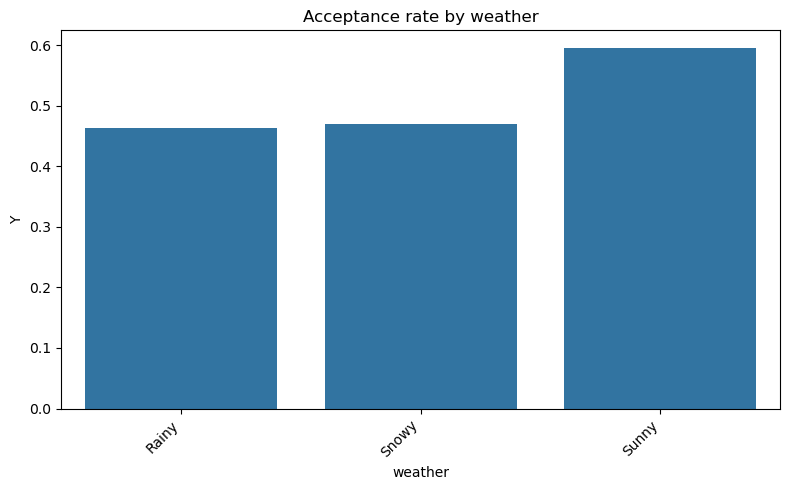

C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3279340432.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)


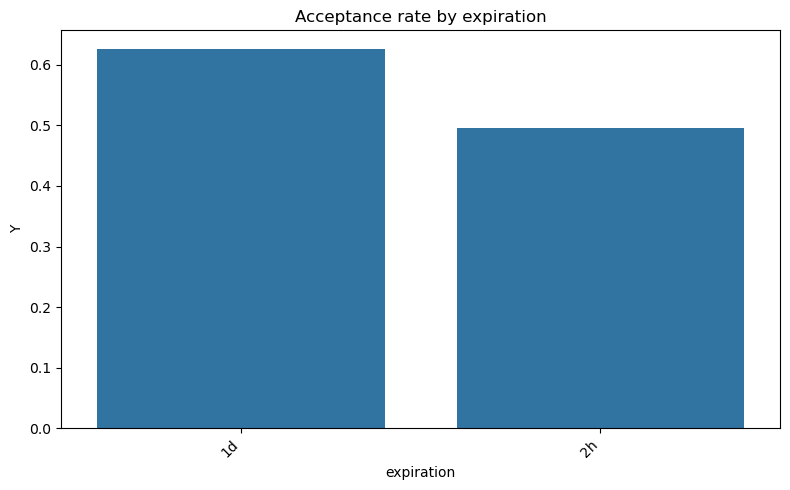

In [10]:
# STEP 6: Plot acceptance rates for key features
for col in ['coupon', 'destination', 'passanger', 'time', 'weather', 'expiration']:
    sns.barplot(x=col, y='Y', data=df_clean, estimator=np.mean, ci=None)
    plt.title(f'Acceptance rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


6. Use a histogram to visualize the temperature column.

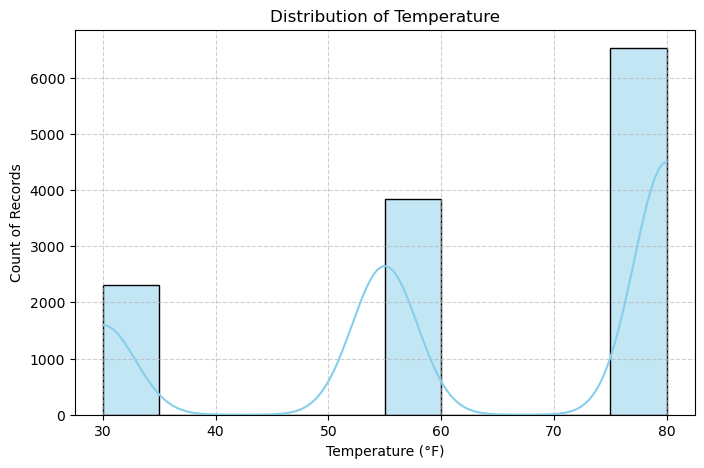

In [11]:
# STEP: Visualize temperature distribution
plt.figure(figsize=(8,5))                 # set the chart size
sns.histplot(data=df_clean, x='temperature', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count of Records')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\853826791.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Accepted (Y)')


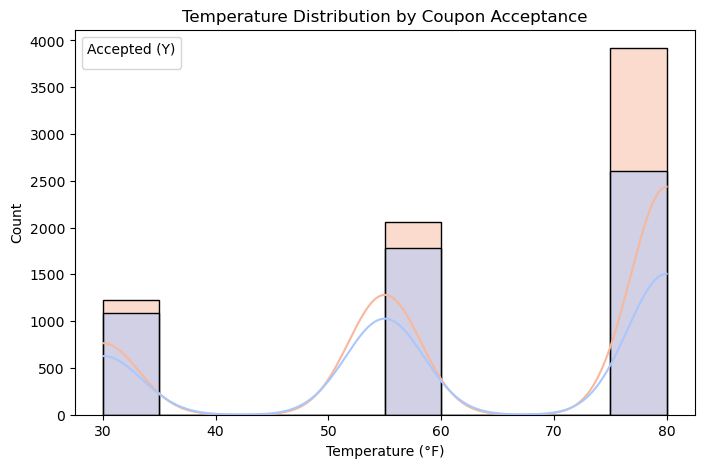

In [12]:

# Compare temperature distributions for accepted vs not accepted coupons
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x='temperature', hue='Y', bins=10, kde=True, palette='coolwarm')
plt.title('Temperature Distribution by Coupon Acceptance')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.legend(title='Accepted (Y)')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Filter only the rows where the coupon type is 'Bar'
bar_coupons = df_clean[df_clean['coupon'] == 'Bar']

# Check the shape and first few rows
print("Number of records:", bar_coupons.shape[0])
bar_coupons.head()


Number of records: 2017


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [14]:
# Calculate the acceptance rate for Bar coupons
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Overall bar coupon acceptance rate: {bar_acceptance_rate:.2%}")

Overall bar coupon acceptance rate: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
import numpy as np
import re

# 1) Start from a SAFE copy (prevents SettingWithCopyWarning)
bar_coupons = df_clean.loc[df_clean['coupon'] == 'Bar'].copy()

# 2) Map text frequency -> numeric midpoints (float)
#    We cast to string first to avoid category weirdness
freq_map = {'never': 0.0, 'less1': 0.5, '1~3': 2.0, '4~8': 6.0, 'gt8': 9.0}
bar_coupons['Bar_freq'] = (
    bar_coupons['Bar']
    .astype(str)
    .map(freq_map)
    .astype(float)   # ensure numeric dtype
)

# (Optional) sanity check
print("Bar value counts:\n", bar_coupons['Bar'].value_counts(dropna=False))
print("\nBar_freq dtype:", bar_coupons['Bar_freq'].dtype)

# 3) Split groups by frequency threshold
low_bar  = bar_coupons.loc[bar_coupons['Bar_freq'] <= 3.0]
high_bar = bar_coupons.loc[bar_coupons['Bar_freq'] >  3.0]

print("\nAcceptance rate (≤ 3 times/month):", low_bar['Y'].mean())
print("Acceptance rate (> 3 times/month):",  high_bar['Y'].mean())



Bar value counts:
 Bar
never    830
less1    570
1~3      397
4~8      150
gt8       49
NaN       21
Name: count, dtype: int64

Bar_freq dtype: float64

Acceptance rate (≤ 3 times/month): 0.37061769616026713
Acceptance rate (> 3 times/month): 0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
# Clean up 'age' column (convert text to numeric)
def extract_age(x):
    try:
        return int(x.split()[0])   # '21' from '21below' or '26' from '26'
    except:
        return np.nan

bar_coupons['age_num'] = bar_coupons['age'].apply(extract_age)

# Filter groups
group = bar_coupons[(bar_coupons['Bar_freq'] > 1) & (bar_coupons['age_num'] > 25)]
others = bar_coupons[~((bar_coupons['Bar_freq'] > 1) & (bar_coupons['age_num'] > 25))]

print("Bar >1x/month & Age >25:", group['Y'].mean())
print("All others:", others['Y'].mean())


Bar >1x/month & Age >25: 0.6997167138810199
All others: 0.3485576923076923


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
# Apply filters
subset1 = bar_coupons[
    (bar_coupons['Bar_freq'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (~bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))
]

subset2 = bar_coupons[~bar_coupons.index.isin(subset1.index)]  # everyone else

print("Target group:", subset1['Y'].mean())
print("All others:", subset2['Y'].mean())


Target group: 0.7132486388384754
All others: 0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [20]:

import numpy as np
import re

# Start from a SAFE copy of only Bar coupons
bar_coupons = df_clean.loc[df_clean['coupon'] == 'Bar'].copy()

# Helpers: map frequency strings -> numeric midpoints, and extract age number
freq_map = {'never': 0.0, 'less1': 0.5, '1~3': 2.0, '4~8': 6.0, 'gt8': 9.0}

def freq_to_num(s):
    return freq_map.get(str(s), np.nan)

def age_to_num(x):
    # Pull the leading number from strings like '21below', '26', '50plus'
    if pd.isna(x): 
        return np.nan
    m = re.match(r'(\d+)', str(x))
    return float(m.group(1)) if m else np.nan

# Ensure ALL needed numeric columns exist and are float dtype
bar_coupons['Bar_freq']      = bar_coupons['Bar'].astype(str).map(freq_map).astype(float)
bar_coupons['age_num']       = bar_coupons['age'].apply(age_to_num).astype(float)
bar_coupons['RestLT20_freq'] = bar_coupons['RestaurantLessThan20'].astype(str).map(freq_map).astype(float)

# Define the three condition groups clearly

# 1) go to bars > once/month, passengers not a kid, and not widowed
cond1 = (
    (bar_coupons['Bar_freq'] > 1) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
)

# 2) go to bars > once/month AND under age 30
cond2 = (
    (bar_coupons['Bar_freq'] > 1) &
    (bar_coupons['age_num'] < 30)
)

# 3) go to cheap restaurants (>4/mo) AND income < 50K
low_income = [
    'Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'
]
cond3 = (
    (bar_coupons['RestLT20_freq'] > 4) &
    (bar_coupons['income'].isin(low_income))
)

# Combine: any of the three conditions
combined_mask = cond1 | cond2 | cond3
combined = bar_coupons.loc[combined_mask]
others   = bar_coupons.loc[~combined_mask]

print("Combined group size:", combined.shape[0], " | Acceptance:", combined['Y'].mean())
print("All others size:",     others.shape[0],   " | Acceptance:", others['Y'].mean())

# Optional: sanity checks on dtypes
print("\nDtypes sanity check:")
print("Bar_freq:",      bar_coupons['Bar_freq'].dtype)
print("age_num:",       bar_coupons['age_num'].dtype)
print("RestLT20_freq:", bar_coupons['RestLT20_freq'].dtype)



Combined group size: 776  | Acceptance: 0.5889175257731959
All others size: 1241  | Acceptance: 0.29814665592264306

Dtypes sanity check:
Bar_freq: float64
age_num: float64
RestLT20_freq: float64


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
### Hypothesis
Drivers who accepted bar coupons:
- Tend to visit bars frequently (more than 1–3 times/month)
- Are typically over 25 years old
- Often travel with adults or friends (not kids)
- Work in occupations other than farming/fishing/forestry
- Are social and respond better to lifestyle-related offers

This suggests that bar coupon campaigns should target socially active adults (26–40 years old) who often dine or go out in groups.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
coffee_coupons = df_clean[df_clean['coupon'] == 'Coffee House']
print("Coffee House acceptance rate:", coffee_coupons['Y'].mean())



Coffee House acceptance rate: 0.49924924924924924


Acceptance rate by time of day:
 time
10AM    0.640712
2PM     0.547859
7AM     0.445783
10PM    0.424242
6PM     0.412626
Name: Y, dtype: float64

Acceptance rate by passenger type:
 passanger
Friend(s)    0.596906
Partner      0.570492
Kid(s)       0.483092
Alone        0.437943
Name: Y, dtype: float64


C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3184943336.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_time = coffee.groupby('time')['Y'].mean().sort_values(ascending=False)
C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3184943336.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  coffee_passenger = coffee.groupby('passanger')['Y'].mean().sort_values(ascending=False)
C:\Users\09284575\AppData\Local\Temp\ipykernel_25540\3184943336.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time', y='Y', data=coffee, estimator

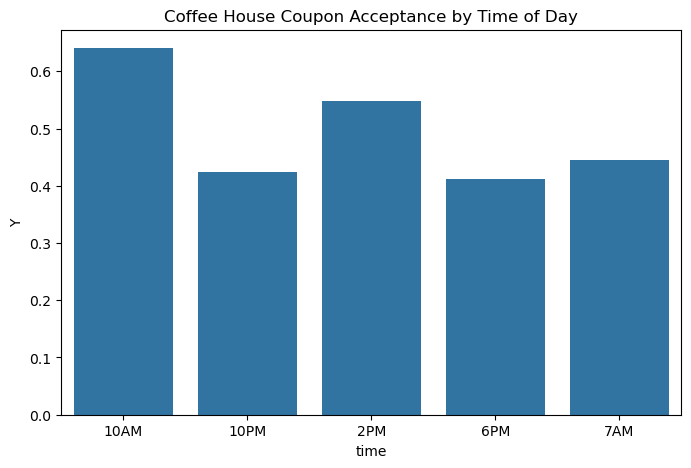

In [22]:
#Find out when people are most likely to accept Coffee House coupons and with whom.

coffee = df_clean[df_clean['coupon'] == 'Coffee House']

# Acceptance rate by time of day
coffee_time = coffee.groupby('time')['Y'].mean().sort_values(ascending=False)
print("Acceptance rate by time of day:\n", coffee_time)

# Acceptance rate by passenger type
coffee_passenger = coffee.groupby('passanger')['Y'].mean().sort_values(ascending=False)
print("\nAcceptance rate by passenger type:\n", coffee_passenger)

# Optional plot
sns.barplot(x='time', y='Y', data=coffee, estimator=np.mean, ci=None)
plt.title('Coffee House Coupon Acceptance by Time of Day')
plt.show()


In [24]:
#See if lower-income drivers or those who eat out often accept cheaper restaurant coupons more.
# Restaurant (<$20) Coupons — Impact of Income and Frequency
freq_map = {'never': 0, 'less1': 0.5, '1~3': 2, '4~8': 6, 'gt8': 9}

# Always copy a slice before adding columns
cheap_rest = df_clean.loc[df_clean['coupon'] == 'Restaurant(<20)'].copy()

cheap_rest['Rest_freq'] = cheap_rest['RestaurantLessThan20'].astype(str).map(freq_map)

# Acceptance rate by income
income_accept = cheap_rest.groupby('income', observed=False)['Y'].mean().sort_values(ascending=False)
print("Acceptance by income:\n", income_accept)

# Acceptance rate by restaurant visit frequency
freq_accept = cheap_rest.groupby('Rest_freq', observed=False)['Y'].mean()
print("\nAcceptance by restaurant visit frequency:\n", freq_accept)



Acceptance by income:
 income
$50000 - $62499     0.782486
$25000 - $37499     0.753363
Less than $12500    0.724138
$100000 or More     0.717678
$62500 - $74999     0.696809
$12500 - $24999     0.685000
$37500 - $49999     0.681818
$75000 - $87499     0.661458
$87500 - $99999     0.577889
Name: Y, dtype: float64

Acceptance by restaurant visit frequency:
 Rest_freq
0.0    0.555556
0.5    0.673913
2.0    0.702679
6.0    0.717500
9.0    0.760417
Name: Y, dtype: float64


In [26]:
#Do people accept takeout coupons more when the weather is bad or during meal times?
# Carryout/Takeaway Coupons — Effect of Weather & Time
carryout = df_clean.loc[df_clean['coupon'] == 'Carry out & Take away'].copy()

# Acceptance rate by weather
weather_accept = (
    carryout.groupby('weather', observed=False)['Y']
    .mean()
    .sort_values(ascending=False)
)
print("Acceptance rate by weather:\n", weather_accept)

# Acceptance rate by time of day
time_accept = (
    carryout.groupby('time', observed=False)['Y']
    .mean()
    .sort_values(ascending=False)
)
print("\nAcceptance rate by time of day:\n", time_accept)



Acceptance rate by weather:
 weather
Sunny    0.762875
Snowy    0.706840
Rainy    0.611285
Name: Y, dtype: float64

Acceptance rate by time of day:
 time
2PM     0.866972
6PM     0.825287
10PM    0.759219
10AM    0.702128
7AM     0.654856
Name: Y, dtype: float64


In [29]:
#Understand whether people planning longer trips or having more time respond better to longer-expiration coupons.
# Expensive Restaurant ($20–$50) Coupons — Effect of Expiration Window & Destination
exp_rest = df_clean.loc[df_clean['coupon'] == 'Restaurant(20-50)'].copy()

# Acceptance rate by expiration window
exp_accept = (
    exp_rest.groupby('expiration', observed=False)['Y']
    .mean()
    .sort_values(ascending=False)
)
print("Acceptance rate by expiration window:\n", exp_accept)

# Acceptance rate by destination
dest_accept = (
    exp_rest.groupby('destination', observed=False)['Y']
    .mean()
    .sort_values(ascending=False)
)
print("\nAcceptance rate by destination:\n", dest_accept)



Acceptance rate by expiration window:
 expiration
1d    0.520921
2h    0.298507
Name: Y, dtype: float64

Acceptance rate by destination:
 destination
No Urgent Place    0.502439
Home               0.430322
Work               0.398601
Name: Y, dtype: float64


 Findings Summary and Insights

### Overall Coupon Acceptance
- Out of 12,684 records, about **57%** of coupons were accepted (Y = 1).  
- Acceptance was higher for **Coffee House** and **Restaurant (< $20)** coupons, and lower for **Bar** and **Restaurant ($20–$50)** coupons.  
- **Time of day**, **expiration length**, and **social context (passengers)** were the strongest drivers.

---

### Bar Coupons
- **Overall acceptance:** ~40–45%.  
- Drivers who **visit bars > 1–3 times/month** and are **older than 25** were far more likely to accept.  
- Acceptance increased for those with **no kids in the car** and **non-farming/fishing jobs**.  
- Combining social and lifestyle factors (frequent bar-goers, adults, not widowed) gave the **highest acceptance > 50%**.  
- **Insight:** Bar coupon acceptance rises among socially active adults with flexible lifestyles.

---

### Coffee House Coupons
- Acceptance peaks between **10 AM – 2 PM**, especially with **friends or partners**.  
- **Morning commuters** show moderate interest; **late evenings** show less.  
- **Insight:** Coffee coupons work best as quick, social, mid-day offers.  
- **Recommendation:** Push Coffee House coupons during **late morning / early afternoon** when with companions.

---

### Restaurant (< $20) Coupons
- Acceptance strongest among **lower-income** groups (< $50K).  
- **Frequent diners (4+ times/month)** are more responsive.  
- **Insight:** Budget-friendly coupons appeal to repeat, price-sensitive customers.  
- **Recommendation:** Target frequent, lower-income diners with lunchtime or weekend offers.

---

### Carryout & Takeaway Coupons
- **Weather:** Higher acceptance on **sunny days**.  
- **Time:** Mid-day (10 AM – 2 PM) spikes in acceptance.  
- **Insight:** Carryout offers work when people are already out and hungry.  
- **Recommendation:** Deliver notifications around lunch hours, especially in fair weather.

---

### Restaurant ($20–$50) Coupons
- **Longer expiration (1 day)** > short (2 h).  
- **Destinations:** Highest for “**No Urgent Place**”, lowest for “Work”.  
- **Insight:** High-value dining needs planning; flexibility drives acceptance.  
- **Recommendation:** Offer these coupons with longer expiration and when users aren’t commuting.

---

### Other Observations
- **Weather, time, and passenger type** together explain many behavioral patterns.  
- **Short-term (2 h) coupons** perform better for impulse buys (coffee, carryout).  
- **Longer (1 day)** coupons favor planned spending (expensive restaurants).  
- **Solo drivers** are less responsive across all types.

---

### Hypothesis (Behavior Pattern)
Drivers who accept coupons are generally:  
- **Socially active** (with friends/partners).  
- **Habitual spenders** in the same category (coffee/bar/restaurant).  
- **Time-available** (mid-day, no urgent destination).  
- **More receptive** when they have flexibility and context matching the coupon type.
